In [20]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
#focus on emission cenc of greenhouse related and how it increased over time to how individual topics over time
# ryan and elizabeth is temp
# danyelle and i are just emissions over time
# statment: is the concentration of co2 and greenhosue gas emissions in our ozone/atmosphere 
# causing the human induced global temperature increase, are these two things correlated
# demonstrate waht it would be like if there were no people, if human activies are causing global warming
# how can we prove that? How do we show that its human and not nature
# 

In [21]:
file = 'Resources/historical_emissions.csv'

data_df = pd.read_csv(file)
data_df.head()

,Country,Data source,Sector,Gas,Unit,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Afghanistan,CAIT,Total including LUCF,CO2,MtCO₂e,7.38,7.39,7.99,7.81,8.51,...,0.82,1.05,1.10,1.18,1.25,1.30,1.36,1.43,2.74,2.96
1,Afghanistan,CAIT,Transportation,CO2,MtCO₂e,3.55,4.16,4.88,3.87,4.85,...,0.35,0.55,0.59,0.64,0.68,0.71,0.74,0.77,1.55,1.67
2,Albania,CAIT,Total including LUCF,CO2,MtCO₂e,5.20,4.54,4.68,4.82,4.40,...,3.06,1.88,1.56,2.05,2.03,2.22,2.15,2.32,4.19,6.13
3,Albania,CAIT,Transportation,CO2,MtCO₂e,2.30,2.29,2.44,2.47,2.46,...,1.40,0.74,0.49,0.62,0.63,0.63,0.51,0.41,0.54,0.71
4,Algeria,CAIT,Total including LUCF,CO2,MtCO₂e,144.66,142.91,145.53,138.37,129.47,...,78.42,75.42,73.71,72.29,73.93,72.43,74.35,67.04,67.82,68.77


In [22]:
total_df = data_df[(data_df =='Total including LUCF').any(axis=1)]

/Users/traex/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [23]:
total_df = total_df.set_index("Country")

# MtCO2e

In [28]:
cleaned_df = total_df.drop(['Data source','Sector','Gas','Unit'],axis = 1)
cleaned_df.head(-10)

,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.38,7.39,7.99,7.81,8.51,10.45,12.26,8.67,6.00,4.39,...,0.82,1.05,1.10,1.18,1.25,1.30,1.36,1.43,2.74,2.96
Albania,5.20,4.54,4.68,4.82,4.40,4.18,4.70,4.33,4.07,3.92,...,3.06,1.88,1.56,2.05,2.03,2.22,2.15,2.32,4.19,6.13
Algeria,144.66,142.91,145.53,138.37,129.47,126.20,117.70,106.39,106.03,97.24,...,78.42,75.42,73.71,72.29,73.93,72.43,74.35,67.04,67.82,68.77
Andorra,NaN,0.45,0.44,0.44,0.45,0.47,0.47,0.48,0.48,0.50,...,0.49,0.47,0.45,0.43,0.41,0.39,0.39,0.39,0.39,0.39
Angola,104.65,109.21,127.43,111.90,123.91,110.94,135.91,111.39,108.16,104.25,...,92.11,95.39,91.13,93.64,97.56,93.47,93.68,93.14,93.30,93.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Uganda,32.10,31.93,32.20,31.51,31.12,30.48,30.86,29.77,29.85,29.25,...,22.18,22.61,21.78,22.08,21.98,21.75,21.83,21.84,21.83,21.80
Ukraine,168.00,194.41,190.28,235.01,261.16,273.53,277.86,247.16,231.36,280.65,...,257.69,261.32,280.27,298.18,353.09,369.51,453.16,528.49,603.92,640.61


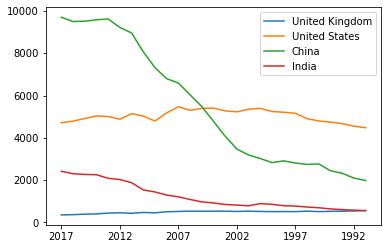

In [36]:
cleaned_df.loc['United Kingdom', "2017":"1991"].plot(label="United Kingdom")
cleaned_df.loc['United States', "2017":"1991"].plot(label="United States")
cleaned_df.loc['China',"2017":"1991"].plot(label='China')
cleaned_df.loc['India',"2017":"1991"].plot(label='India')
plt.legend()
plt.show()

In [35]:
cleaned_df.columns.tolist()

['2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999',
 '1998',
 '1997',
 '1996',
 '1995',
 '1994',
 '1993',
 '1992',
 '1991',
 '1990']

In [37]:
reorg_df = cleaned_df.reindex(columns=['1990',
                                      '1991',
                                      '1992',
                                      '1993',
                                      '1994',
                                      '1995',
                                      '1996',
                                      '1997',
                                      '1998',
                                      '1999',
                                      '2001',
                                      '2002',
                                      '2003',
                                      '2004',
                                      '2005',
                                      '2006',
                                      '2007',
                                      '2008',
                                      '2009',
                                      '2010',
                                      '2011',
                                      '2012',
                                      '2013',
                                      '2014',
                                      '2015',
                                      '2016',
                                      '2017'])

In [38]:
reorg_df.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.96,2.74,1.43,1.36,1.30,1.25,1.18,1.10,1.05,0.82,...,4.39,6.00,8.67,12.26,10.45,8.51,7.81,7.99,7.39,7.38
Albania,6.13,4.19,2.32,2.15,2.22,2.03,2.05,1.56,1.88,3.06,...,3.92,4.07,4.33,4.70,4.18,4.40,4.82,4.68,4.54,5.20
Algeria,68.77,67.82,67.04,74.35,72.43,73.93,72.29,73.71,75.42,78.42,...,97.24,106.03,106.39,117.70,126.20,129.47,138.37,145.53,142.91,144.66
Andorra,0.39,0.39,0.39,0.39,0.39,0.41,0.43,0.45,0.47,0.49,...,0.50,0.48,0.48,0.47,0.47,0.45,0.44,0.44,0.45,NaN
Angola,93.10,93.30,93.14,93.68,93.47,97.56,93.64,91.13,95.39,92.11,...,104.25,108.16,111.39,135.91,110.94,123.91,111.90,127.43,109.21,104.65


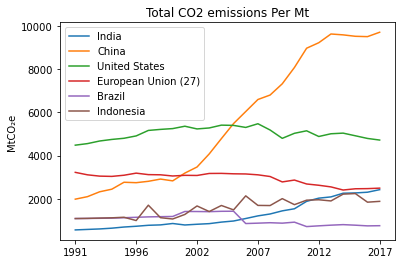

In [57]:
reorg_df.loc['India',"1991":"2017"].plot(label='India')
reorg_df.loc['China',"1991":"2017"].plot(label='China')
reorg_df.loc['United States',"1991":"2017"].plot(label='United States')
reorg_df.loc['European Union (27)',"1991":"2017"].plot(label='European Union (27)')
reorg_df.loc['Brazil',"1991":"2017"].plot(label='Brazil')
reorg_df.loc['Indonesia',"1991":"2017"].plot(label='Indonesia')

plt.legend()
plt.ylabel('MtCO₂e')
plt.title('Total CO2 emissions Per Mt')
plt.show()

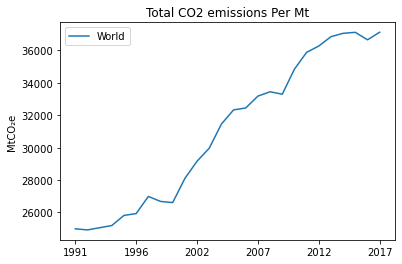

In [53]:
reorg_df.loc['World',"1991":"2017"].plot(label='World')

plt.legend()
plt.ylabel('MtCO₂e')
plt.title('Total CO2 emissions Per Mt')
plt.show()

In [58]:
file2 = 'Resources/Trans and Industrial.csv'
df2= pd.read_csv(file2)
df2.head()

,Country,Data source,Sector,Gas,Unit,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Afghanistan,CAIT,Industrial Processes,CO2,MtCO₂e,0.05,0.05,0.03,0.04,0.02,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.04
1,Afghanistan,CAIT,Transportation,CO2,MtCO₂e,3.55,4.16,4.88,3.87,4.85,...,0.35,0.55,0.59,0.64,0.68,0.71,0.74,0.77,1.55,1.67
2,Albania,CAIT,Industrial Processes,CO2,MtCO₂e,1.26,1.26,1.25,1.10,1.15,...,0.05,0.04,0.05,0.10,0.10,0.05,0.10,0.10,0.30,0.37
3,Albania,CAIT,Transportation,CO2,MtCO₂e,2.30,2.29,2.44,2.47,2.46,...,1.40,0.74,0.49,0.62,0.63,0.63,0.51,0.41,0.54,0.71
4,Algeria,CAIT,Industrial Processes,CO2,MtCO₂e,9.16,9.16,9.16,8.36,7.30,...,3.44,3.45,3.27,3.01,3.17,2.82,2.99,3.00,2.97,2.99


In [68]:
trans_df = df2[(df2 =='Transportation').any(axis=1)]
indus_df = df2[(df2 =='Industrial Processes').any(axis=1)]

/Users/traex/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [69]:
trans_df.head()

,Country,Data source,Sector,Gas,Unit,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
1,Afghanistan,CAIT,Transportation,CO2,MtCO₂e,3.55,4.16,4.88,3.87,4.85,...,0.35,0.55,0.59,0.64,0.68,0.71,0.74,0.77,1.55,1.67
3,Albania,CAIT,Transportation,CO2,MtCO₂e,2.30,2.29,2.44,2.47,2.46,...,1.40,0.74,0.49,0.62,0.63,0.63,0.51,0.41,0.54,0.71
5,Algeria,CAIT,Transportation,CO2,MtCO₂e,44.69,45.19,46.41,43.51,40.26,...,16.47,15.46,15.01,14.96,15.11,15.52,16.96,16.80,16.88,15.81
7,Angola,CAIT,Transportation,CO2,MtCO₂e,6.72,7.91,7.98,7.94,7.70,...,1.16,0.83,1.05,0.99,1.07,1.54,1.21,1.19,1.26,1.02
9,Antigua and Barbuda,CAIT,Transportation,CO2,MtCO₂e,0.21,0.21,0.20,0.19,0.19,...,0.16,0.16,0.14,0.14,0.14,0.13,0.13,0.14,0.10,0.10


In [70]:
indus_df.head()

,Country,Data source,Sector,Gas,Unit,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Afghanistan,CAIT,Industrial Processes,CO2,MtCO₂e,0.05,0.05,0.03,0.04,0.02,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.04
2,Albania,CAIT,Industrial Processes,CO2,MtCO₂e,1.26,1.26,1.25,1.10,1.15,...,0.05,0.04,0.05,0.10,0.10,0.05,0.10,0.10,0.30,0.37
4,Algeria,CAIT,Industrial Processes,CO2,MtCO₂e,9.16,9.16,9.16,8.36,7.30,...,3.44,3.45,3.27,3.01,3.17,2.82,2.99,3.00,2.97,2.99
6,Angola,CAIT,Industrial Processes,CO2,MtCO₂e,0.95,0.95,0.99,0.97,0.78,...,0.08,0.14,0.12,0.11,0.08,0.10,0.10,0.12,0.11,0.11
8,Antigua and Barbuda,CAIT,Industrial Processes,CO2,MtCO₂e,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [80]:
cleaned_indus_df = indus_df.drop(['Data source','Sector','Gas','Unit'],axis = 1)
cleaned_trans_df = trans_df.drop(['Data source','Sector','Gas','Unit'],axis = 1)
cleaned_indus_df = total_indus_df.set_index("Country")
cleaned_trans_df = total_indus_df.set_index("Country")

NameError: name 'total_indus_df' is not defined

In [79]:
cleaned_indus_df.head()

,Country,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Afghanistan,0.05,0.05,0.03,0.04,0.02,0.01,0.01,0.01,0.01,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.04
2,Albania,1.26,1.26,1.25,1.10,1.15,1.10,0.90,0.65,0.55,...,0.05,0.04,0.05,0.10,0.10,0.05,0.10,0.10,0.30,0.37
4,Algeria,9.16,9.16,9.16,8.36,7.30,7.70,8.19,8.25,8.22,...,3.44,3.45,3.27,3.01,3.17,2.82,2.99,3.00,2.97,2.99
6,Angola,0.95,0.95,0.99,0.97,0.78,0.61,0.57,0.58,0.69,...,0.08,0.14,0.12,0.11,0.08,0.10,0.10,0.12,0.11,0.11
8,Antigua and Barbuda,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [73]:
reorg_indus = cleaned_indus_df.reindex(columns=['1990',
                                      '1991',
                                      '1992',
                                      '1993',
                                      '1994',
                                      '1995',
                                      '1996',
                                      '1997',
                                      '1998',
                                      '1999',
                                      '2001',
                                      '2002',
                                      '2003',
                                      '2004',
                                      '2005',
                                      '2006',
                                      '2007',
                                      '2008',
                                      '2009',
                                      '2010',
                                      '2011',
                                      '2012',
                                      '2013',
                                      '2014',
                                      '2015',
                                      '2016',
                                      '2017'])
reorg_trans = cleaned_trans_df.reindex(columns=['1990',
                                      '1991',
                                      '1992',
                                      '1993',
                                      '1994',
                                      '1995',
                                      '1996',
                                      '1997',
                                      '1998',
                                      '1999',
                                      '2001',
                                      '2002',
                                      '2003',
                                      '2004',
                                      '2005',
                                      '2006',
                                      '2007',
                                      '2008',
                                      '2009',
                                      '2010',
                                      '2011',
                                      '2012',
                                      '2013',
                                      '2014',
                                      '2015',
                                      '2016',
                                      '2017'])

In [77]:
reorg_indus.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.04,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.01,0.01,0.01,0.01,0.01,0.02,0.04,0.03,0.05,0.05
2,0.37,0.30,0.10,0.10,0.05,0.10,0.10,0.05,0.04,0.05,...,0.46,0.55,0.65,0.90,1.10,1.15,1.10,1.25,1.26,1.26
4,2.99,2.97,3.00,2.99,2.82,3.17,3.01,3.27,3.45,3.44,...,7.58,8.22,8.25,8.19,7.70,7.30,8.36,9.16,9.16,9.16
6,0.11,0.11,0.12,0.10,0.10,0.08,0.11,0.12,0.14,0.08,...,0.68,0.69,0.58,0.57,0.61,0.78,0.97,0.99,0.95,0.95
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
